# Optional Exercises for Coursera ML

Import the tools this notebook is going to use:


In [1]:
import numpy
import math
from matplotlib import pyplot as plt
%matplotlib inline

Here is a function to load the data from the CSV files into a pandas dataframe:

In [2]:
from numpy import genfromtxt
def load(f):
    '''Parse the data from the input file and store in pandas dataframs'''
    # Verify the file exist:
    try:
        _file = open(f, "r")
    except:
        print "ERROR: requested file {} does not exist or could not be opened."
 
    # For this exercise, both files are csv format:
    data = numpy.genfromtxt(f,delimiter=',')
    return data.T

Let's load the initial data into a data frame. We can pass the names of the columns along:

In [3]:
x1,x2,y = load("ex1/ex1data2.txt")


As in the main exercise, we should plot the initial data to verify it looks good:

In [4]:
def plotInitialData(x1,x2,y):
    # Now, let's plot the Profit as a function of the population:

    # Set up the plots
    fig, ax = plt.subplots(figsize=(10, 7))

    # Make a scatter plot
    ax.scatter(x1, x2, c=y,s=100, label="House Prices")

    # Plots require a title and axis labels:
    plt.title("Housing Prices", fontsize=30)
    plt.xlabel("House Size [$ft^2$]", fontsize=20)
    plt.ylabel("Number of Bedrooms", fontsize=20)

    # Make the ticks bigger to be more visible:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)

    # Let's set the axis ranges a little more realistically:
    #ax.set_xlim([5, 25])
    #ax.set_ylim([-5, 30])

    # Need a legend, of course:
    plt.legend()

    plt.grid(True)

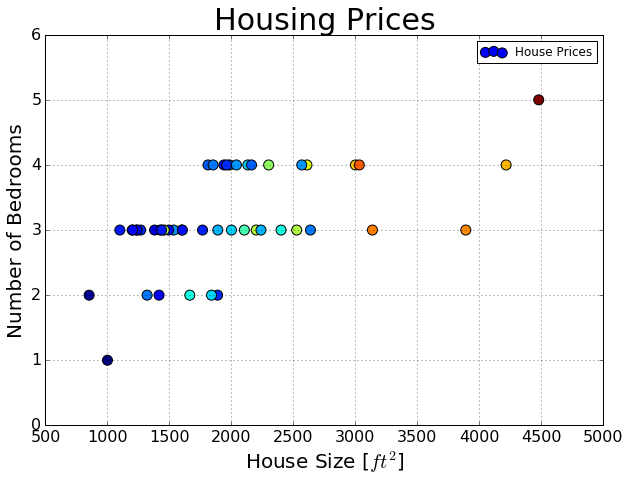

In [5]:
plotInitialData(x1,x2,y)

Clearly, there is a correlation there.

We want to do feature normalization, but we want to keep track of the way we do it.  So make a function that we can use later on to normalize input data

In [6]:
mean_x1 = numpy.mean(x1)
mean_x2 = numpy.mean(x2)
std_x1 = numpy.std(x1)
std_x2 = numpy.std(x2)

def featureNormalize(x_vec):
    # Check the length.  Remember that x gets padded to account for theta_0.
    if len(x_vec) != 3:
        print "Can not normalize this vector, it isn't formatted properly"
        return None
    x_vec[1] = (x_vec[1] - mean_x1)/std_x1
    x_vec[2] = (x_vec[2] - mean_x2)/std_x2
    
    return x_vec

Of course, we can feature normalize the training set more efficiently if we use numpy's built in utilities

In [7]:
x1 = (x1 - mean_x1)/std_x1
x2 = (x2 - mean_x2)/std_x2

Let's look at the initial plot again to see how things look:

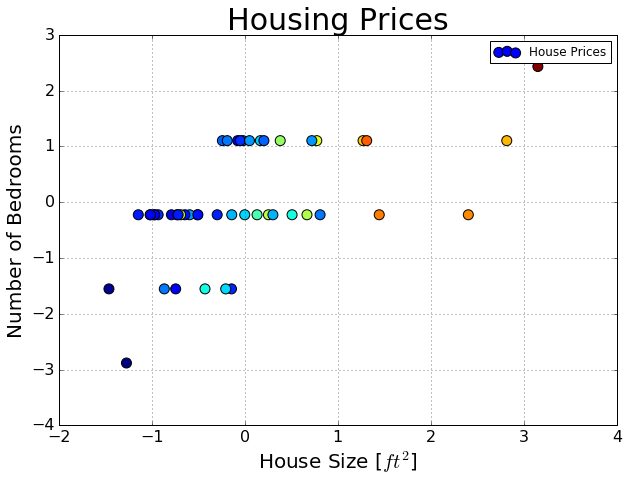

In [8]:
plotInitialData(x1,x2,y)

Now things are on the same order of magnitude.  Of course, the axis labels are now completely wrong!

Because of the way the cost function was written for the non-optional part of this exercise, it's completely transferable here:

In [9]:
def computeCost(xvec,y,theta):
    '''Compute the cost of the data frame:
    '''
    cost_sum = numpy.sum((numpy.dot(theta,xvec) - y)**2)
    cost = 1.0/(2.*len(y))*cost_sum
    return cost

def updateParams(_alpha, _theta, _xvec, _y):

    # We can update these pretty compactly:
    # This loops over the number of parameters in the vector (2, in this case)
    difference_sums = numpy.zeros(len(theta))
    for param in xrange(len(_xvec)):
        # This computes the prediction vector for the current theta as numpy.dot(theta,_xvec)
        # Then, take the difference from y and multiply that by _xvec[i] to get the update vector
        diff_vec = numpy.dot(numpy.dot(_theta,_xvec) - _y,_xvec[param])
        difference_sums[param] = (_alpha / len(y))*numpy.sum(diff_vec)

    #The updated theta can now be computed pretty easily:
    _updated_theta = numpy.zeros(len(_theta))
    for param in xrange(len(_xvec)):
        _updated_theta[param] = _theta[param] - difference_sums[param]

    return _updated_theta

Let's set up the x vector, y, and theta and then do the gradient descent!

In [10]:
# Theta needs three values this time:
theta = numpy.zeros(3)
# X vector needs to be three by m dimensional
xvec = numpy.zeros((3,len(y)))
# Set everything in the first column to 1
xvec[0] = 1
# and the other columns are the features
xvec[1] = x1
xvec[2] = x2


For completeness, let's compute the initial cost:

In [11]:
print "Initial cost is {}".format(computeCost(xvec,y,theta))

Initial cost is 65591548106.5


In [18]:
iterations=750
alpha=0.01
cost_list = []
theta_history = []
for i in xrange(iterations):
    # Update the theta parameters:
    theta = updateParams(alpha, theta, xvec,y)
    theta_history.append(theta)
    # Compute the current cost
    cost_list.append(computeCost(xvec,y,theta))

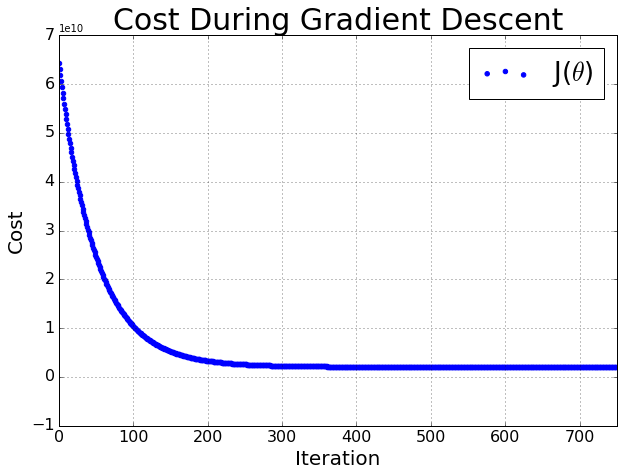

In [13]:
def plotCost(x,y,color=None):
    
    #Define the plot
    fig, ax = plt.subplots(figsize=(10,7))
    
    #Plot the data
    # Notice that I have to use a raw string (with the r in front) to render the theta correctly
    
    if color is None:
        color = "r"
    
    plt.scatter(x,y,marker="o",color=color,label=r"J($\theta$)")
    

    # Plots require a title and axis labels:
    plt.title("Cost During Gradient Descent", fontsize=30)
    plt.xlabel("Iteration", fontsize=20)
    plt.ylabel("Cost", fontsize=20)

    # Make the ticks bigger to be more visible:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    
    # Set the plot limits
    ax.set_xlim(0,iterations)

    # Always, plt.grid(True)
    plt.grid(True)
    plt.legend(fontsize=26)
    

it = range(iterations)
plotCost(it,cost_list,'b')


Clearly, the gradient descent optimized quickly with the learning rates used.  Now let's apply the model to some new data:

In [29]:
house_info = [1,1650, 3] # 1650 square_feet, 3 bedrooms
print "House price is ${}".format(math.trunc(numpy.dot(theta,featureNormalize(house_info))))

House price is $293098


In [20]:
theta_norm = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(xvec, xvec.T)),xvec),y)

In [33]:
house_info = [1,1650, 3] # 1650 square_feet, 3 bedrooms
print "House price is ${}".format(math.trunc(numpy.dot(theta_norm,featureNormalize(house_info))))

House price is $293081
